## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import datetime

## Data Awal (kotor)

In [2]:
df=pd.read_excel("C:/Users/user/Downloads/alldata.xlsx")

In [3]:
df.sort_values(by="tanggal_transaksi",ascending=True)

,no_transaksi,tanggal_transaksi,hari_transaksi,waktu_transaksi,jenis_pelanggan,kode_item,nama_item,jumlah_item,kategori
1502,70247,2024-03-01,jumat,10:23:00,umum,161,md donat jabrik,5,makanan
1539,70265,2024-03-01,jumat,11:42:00,umum,1865,euro kulit dimsum,1,sembako
1538,70264,2024-03-01,jumat,11:26:00,umum,2818,garuda rosta kacang panggang 20 gr,1,makanan
1537,70264,2024-03-01,jumat,11:26:00,umum,2058,chitato lite rumput laut 14gr (60),1,makanan
1535,70262,2024-03-01,jumat,11:23:00,umum,544,vit burger sapi 280gr,1,makanan
...,...,...,...,...,...,...,...,...,...
2351,71557,2024-03-13,rabu,10:17:00,umun,59,se nugget 500gr,1,sembako
2350,71556,2024-03-13,rabu,10:11:00,umun,86,belf nugget ayam ceria 170gr,1,sembako
2349,71556,2024-03-13,rabu,10:11:00,umun,1309,salam nugget ayam 250gr,1,sembako
2355,71558,2024-03-13,rabu,10:18:00,umun,1303,kulit lumpia tip top isi 50,1,sembako


In [4]:
df["jenis_pelanggan"] = df["jenis_pelanggan"].replace("umun", "umum")

In [5]:
df['tanggal_transaksi']=pd.to_datetime(df['tanggal_transaksi'])

## Menyamakan Nama Item

In [6]:
roww=pd.read_excel("C:/Users/user/Downloads/perbandingan benar.xlsx")

In [7]:
roww

,col1,col2
0,aice bingo,aice bingo cone
1,aice chocholate two colour (40),aice chocholate two colour
2,aice choco malt (50),aice choco malt
3,aice cone choco melt (24),aice cone choco melt
4,aice cone strawberry (24),aice cone strawberry
...,...,...
321,yupi all item(24),yupi all item
322,yupi so nice siap santap 21gr (25),yupi so nice siap santap 21gr
323,yupi toples 300gr,yupi toples 300gr
324,yuro kulit lumpia isi 50 (25),yuro kulit lumpia isi 50


In [8]:
replace1= dict(zip(roww['col1'], roww['col2']))

df['nama_item'] = df['nama_item'].replace(replace1)

## Menjeneralkan item

In [9]:
rev2=pd.read_excel("C:/Users/user/Downloads/replace2.xlsx")
rev2.head()

,kol1,kol2
0,5 days croissant all rasa,croissant
1,abon ayam 100gr,abon
2,abon sapi 100gr,abon
3,agar agar kijang 7g,agar-agar
4,aice bingo cone,es krim


In [10]:
replace2= dict(zip(rev2['kol1'], rev2['kol2']))

df['nama_item'] = df['nama_item'].replace(replace2)

## Final Item

In [11]:
a=df['nama_item'].unique()

In [12]:
ayo = pd.DataFrame({'nama': a}).sort_values(by='nama')
ayo

,nama
58,abon
70,agar-agar
7,air mineral
77,amor starqueen long 550gr
63,andalan 12
...,...
35,tusuk sate cap ikan koi
50,viaz all item
86,vitamin
68,yakult


In [13]:
df.sort_values(by='tanggal_transaksi')

,no_transaksi,tanggal_transaksi,hari_transaksi,waktu_transaksi,jenis_pelanggan,kode_item,nama_item,jumlah_item,kategori
1502,70247,2024-03-01,jumat,10:23:00,umum,161,donat,5,makanan
1539,70265,2024-03-01,jumat,11:42:00,umum,1865,kulit dimsum,1,sembako
1538,70264,2024-03-01,jumat,11:26:00,umum,2818,snack,1,makanan
1537,70264,2024-03-01,jumat,11:26:00,umum,2058,snack,1,makanan
1535,70262,2024-03-01,jumat,11:23:00,umum,544,daging olahan,1,makanan
...,...,...,...,...,...,...,...,...,...
2351,71557,2024-03-13,rabu,10:17:00,umum,59,daging olahan,1,sembako
2350,71556,2024-03-13,rabu,10:11:00,umum,86,daging olahan,1,sembako
2349,71556,2024-03-13,rabu,10:11:00,umum,1309,daging olahan,1,sembako
2355,71558,2024-03-13,rabu,10:18:00,umum,1303,kulit lumpia,1,sembako


In [14]:
# ayo.to_excel('ayocek.xlsx', index=True)

In [15]:
# df.to_excel('dataolahPBI.xlsx', index=True)

In [16]:
# df.to_excel('dataasosiasi.xlsx', index=True)

In [17]:
df.columns

Index(['no_transaksi', 'tanggal_transaksi', 'hari_transaksi',
       'waktu_transaksi', 'jenis_pelanggan', 'kode_item', 'nama_item',
       'jumlah_item', 'kategori'],
      dtype='object')

## Asosiasi

In [18]:
basket = df.groupby(["no_transaksi", "nama_item"])["jumlah_item"].count().unstack().reset_index().fillna(0).set_index("no_transaksi")
basket

nama_item,abon,agar-agar,air mineral,amor starqueen long 550gr,andalan 12,aroma ultra all item,baso aci,basreng,blackp pepper,bobatee 1kg,...,tepung,tepung panir,the,tisu,tusuk cilot cap ikan koi,tusuk sate cap ikan koi,viaz all item,vitamin,yakult,yogurt
no_transaksi,,,,,,,,,,,,,,,,,,,,,
70225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70229,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
711477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# basket.to_excel('basket.xlsx', index=False)

In [20]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    
basket_sets=basket.applymap(encode_units)
basket_sets.head(3)

nama_item,abon,agar-agar,air mineral,amor starqueen long 550gr,andalan 12,aroma ultra all item,baso aci,basreng,blackp pepper,bobatee 1kg,...,tepung,tepung panir,the,tisu,tusuk cilot cap ikan koi,tusuk sate cap ikan koi,viaz all item,vitamin,yakult,yogurt
no_transaksi,,,,,,,,,,,,,,,,,,,,,
70225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# basket_sets.to_excel('basset.xlsx', index=True)

In [37]:
frequent_itemsets=apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets=frequent_itemsets.sort_values(by='support').reset_index(drop=True)

C:\Users\user\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [39]:
frequent_itemsets

,support,itemsets
0,0.010256,"(roti frozen, selai)"
1,0.010256,"(es krim, susu)"
2,0.010256,"(jelly, snack)"
3,0.010256,"(daging olahan, baso aci)"
4,0.010256,"(permen, susu)"
...,...,...
62,0.088205,(saus sambal)
63,0.088205,(es krim)
64,0.089231,(kulit lumpia)
65,0.173333,(snack)


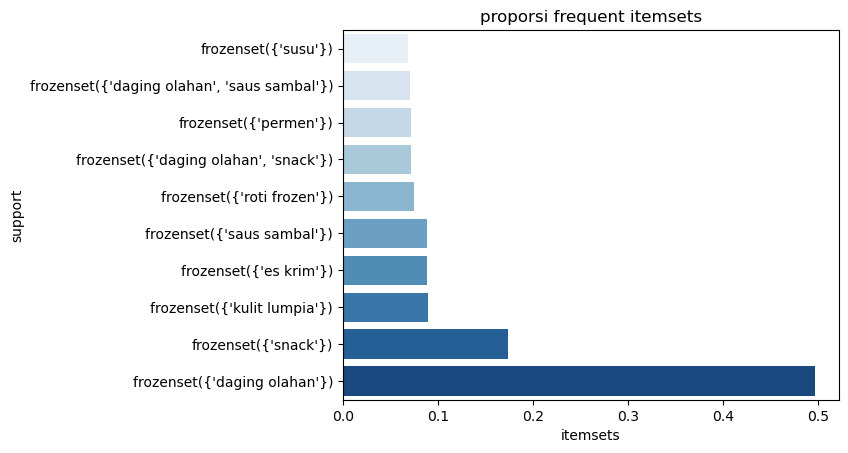

In [41]:
sns.barplot(y = frequent_itemsets['itemsets'].tail(10), x= frequent_itemsets['support'].tail(10), palette = 'Blues')
plt.ylabel('support')
plt.xlabel('itemsets')
plt.xticks(fontsize =10)
plt.title('proporsi frequent itemsets')
plt.show()

In [23]:
frequent_itemsets.to_excel('frequent_itemsets.xlsx', index=True)

In [24]:
rules1=association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(daging olahan),(baso aci),0.497436,0.015385,0.010256,0.020619,1.340206,0.002604,1.005344,0.505102
1,(baso aci),(daging olahan),0.015385,0.497436,0.010256,0.666667,1.340206,0.002604,1.507692,0.257812
2,(daging olahan),(brownies),0.497436,0.032821,0.018462,0.037113,1.130799,0.002135,1.004458,0.230159
3,(brownies),(daging olahan),0.032821,0.497436,0.018462,0.562500,1.130799,0.002135,1.148718,0.119595
4,(brownies),(snack),0.032821,0.173333,0.011282,0.343750,1.983173,0.005593,1.259683,0.512581
5,(snack),(brownies),0.173333,0.032821,0.011282,0.065089,1.983173,0.005593,1.034515,0.599707
6,(daging olahan),(cireng),0.497436,0.029744,0.025641,0.051546,1.733025,0.010845,1.022988,0.841633
7,(cireng),(daging olahan),0.029744,0.497436,0.025641,0.862069,1.733025,0.010845,3.643590,0.435941
8,(daging olahan),(jelly),0.497436,0.026667,0.014359,0.028866,1.082474,0.001094,1.002265,0.151603
9,(jelly),(daging olahan),0.026667,0.497436,0.014359,0.538462,1.082474,0.001094,1.088889,0.078278


In [25]:
result1=rules1[(rules1['lift']>=1.5)&
              (rules1['confidence']>=0.1)]

apr_result=result1.sort_values(by='confidence', ascending=False)
apr_result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(saus tomat),(daging olahan),0.014359,0.497436,0.013333,0.928571,1.866716,0.006191,7.035897,0.471064
7,(cireng),(daging olahan),0.029744,0.497436,0.025641,0.862069,1.733025,0.010845,3.643590,0.435941
12,(mayonais),(daging olahan),0.020513,0.497436,0.017436,0.850000,1.708763,0.007232,3.350427,0.423468
46,"(saus sambal, snack)",(daging olahan),0.019487,0.497436,0.016410,0.842105,1.692892,0.006717,3.182906,0.417429
15,(saus sambal),(daging olahan),0.088205,0.497436,0.070769,0.802326,1.612923,0.026893,2.542383,0.416769
35,(selai),(roti frozen),0.018462,0.074872,0.010256,0.555556,7.420091,0.008874,2.081538,0.881505
40,"(daging olahan, permen)",(snack),0.032821,0.173333,0.014359,0.437500,2.524038,0.008670,1.469630,0.624299
30,(permen),(snack),0.071795,0.173333,0.030769,0.428571,2.472527,0.018325,1.446667,0.641621
28,(jelly),(snack),0.026667,0.173333,0.010256,0.384615,2.218935,0.005634,1.343333,0.564384
4,(brownies),(snack),0.032821,0.173333,0.011282,0.343750,1.983173,0.005593,1.259683,0.512581


In [26]:
result1=rules1[(rules1['lift']>=1.5)&
              (rules1['confidence']>=0.5)]

apr_result=result1.sort_values(by='confidence', ascending=False)
apr_result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(saus tomat),(daging olahan),0.014359,0.497436,0.013333,0.928571,1.866716,0.006191,7.035897,0.471064
7,(cireng),(daging olahan),0.029744,0.497436,0.025641,0.862069,1.733025,0.010845,3.643590,0.435941
12,(mayonais),(daging olahan),0.020513,0.497436,0.017436,0.850000,1.708763,0.007232,3.350427,0.423468
46,"(saus sambal, snack)",(daging olahan),0.019487,0.497436,0.016410,0.842105,1.692892,0.006717,3.182906,0.417429
15,(saus sambal),(daging olahan),0.088205,0.497436,0.070769,0.802326,1.612923,0.026893,2.542383,0.416769
35,(selai),(roti frozen),0.018462,0.074872,0.010256,0.555556,7.420091,0.008874,2.081538,0.881505


In [27]:
result1=rules1[(rules1['lift']>=1.5)&
              (rules1['confidence']>=0.5)]

apr_result=result1.sort_values(by='confidence', ascending=False)
apr_result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(saus tomat),(daging olahan),0.014359,0.497436,0.013333,0.928571,1.866716,0.006191,7.035897,0.471064
7,(cireng),(daging olahan),0.029744,0.497436,0.025641,0.862069,1.733025,0.010845,3.643590,0.435941
12,(mayonais),(daging olahan),0.020513,0.497436,0.017436,0.850000,1.708763,0.007232,3.350427,0.423468
46,"(saus sambal, snack)",(daging olahan),0.019487,0.497436,0.016410,0.842105,1.692892,0.006717,3.182906,0.417429
15,(saus sambal),(daging olahan),0.088205,0.497436,0.070769,0.802326,1.612923,0.026893,2.542383,0.416769
35,(selai),(roti frozen),0.018462,0.074872,0.010256,0.555556,7.420091,0.008874,2.081538,0.881505


In [44]:
apr_result["item gabungan"] = apr_result["antecedents"].astype(str) + apr_result["consequents"].astype(str)

In [45]:
apr_result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,item gabungan
17,(saus tomat),(daging olahan),0.014359,0.497436,0.013333,0.928571,1.866716,0.006191,7.035897,0.471064,frozenset({'saus tomat'})frozenset({'daging ol...
7,(cireng),(daging olahan),0.029744,0.497436,0.025641,0.862069,1.733025,0.010845,3.643590,0.435941,frozenset({'cireng'})frozenset({'daging olahan'})
12,(mayonais),(daging olahan),0.020513,0.497436,0.017436,0.850000,1.708763,0.007232,3.350427,0.423468,frozenset({'mayonais'})frozenset({'daging olah...
46,"(saus sambal, snack)",(daging olahan),0.019487,0.497436,0.016410,0.842105,1.692892,0.006717,3.182906,0.417429,"frozenset({'saus sambal', 'snack'})frozenset({..."
15,(saus sambal),(daging olahan),0.088205,0.497436,0.070769,0.802326,1.612923,0.026893,2.542383,0.416769,frozenset({'saus sambal'})frozenset({'daging o...
35,(selai),(roti frozen),0.018462,0.074872,0.010256,0.555556,7.420091,0.008874,2.081538,0.881505,frozenset({'selai'})frozenset({'roti frozen'})


In [50]:
import plotly.express as px

fig = px.treemap(apr_result, path=["item gabungan"], values="confidence", color="confidence",
                 color_continuous_scale="blues", color_continuous_midpoint=0.5)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

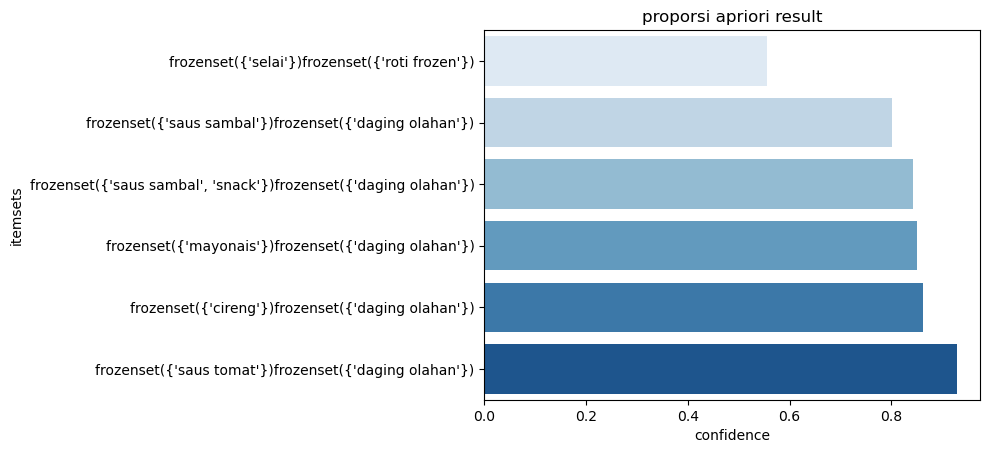

In [54]:
apr_result = apr_result.sort_values(by='confidence', ascending=True)

# Buat palet warna
palette = sns.color_palette("Blues", len(apr_result))

# Plot data
sns.barplot(y=apr_result['item gabungan'], x=apr_result['confidence'], palette=palette)
plt.ylabel('itemsets')
plt.xlabel('confidence')
plt.xticks(fontsize=10)
plt.title('proporsi apriori result')
plt.show()